### Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML, Image


%matplotlib inline
plt.style.use('seaborn-white')

### Vectorized implementation of cost function, gradient descent and closed form solution

In [9]:
def costFunctionReg(X,y,theta,lamda = 10):    
    #Initializations
    m = len(y) 
    J = 0
    
    #Computations
    h = X @ theta
    J_reg = (lamda / (2*m)) * np.sum(np.square(theta))
    J = float((1./(2*m)) * (h - y).T @ (h - y)) + J_reg;
    
    if np.isnan(J):
        return(np.inf)
    
    return(J) 


def gradient_descent_reg(X,y,theta,alpha = 0.0005,lamda = 10,num_iters=1000):
    #Initialisation of useful values 
    m = np.size(y)
    J_history = np.zeros(num_iters)
    theta_0_hist, theta_1_hist = [], [] #Used for three d plot

    for i in range(num_iters):
        #Hypothesis function
        h = np.dot(X,theta)
        
        #Calculating the grad function in vectorized form
        theta = theta - alpha * (1/m)* (  (X.T @ (h-y)) + lamda * theta )
           
        #Cost function in vectorized form       
        J_history[i] = costFunctionReg(X,y,theta,lamda)
           
        #Calculate the cost for each iteration(used to plot convergence)
        theta_0_hist.append(theta[0,0])
        theta_1_hist.append(theta[1,0])
    
    return theta ,J_history, theta_0_hist, theta_1_hist

def closed_form_reg_solution(X,y,lamda = 10): 
    m,n = X.shape
    I = np.eye((n))
    return np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y

The data
Sine curve with uniform noise

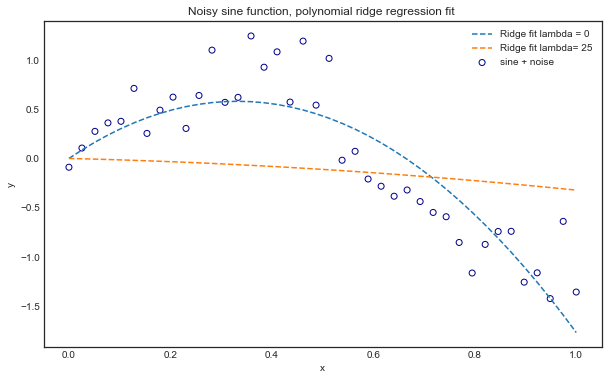

'Coefficients with lambda = 25 are: '

array([[-0.12297955],
       [-0.198557  ]])

In [7]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)
y_noise = y_noise - y_noise.mean() #Centering the dataset


#Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(x,y_noise, facecolors = 'none', edgecolor = 'darkblue', label = 'sine + noise')
plt.title('Noisy sine function, polynomial ridge regression fit ')
plt.xlabel('x')
plt.ylabel('y')

#Design matrix for polynomial regression of order 2
X = np.vstack((x,x**2)).T

#Calculating closed form regression coefficients with lamda = 0 and 25
theta_calc_0 = closed_form_reg_solution(X,y_noise,lamda = 0)
theta_calc_25 = closed_form_reg_solution(X,y_noise,lamda = 25)

#Plot
plt.plot(x,X@theta_calc_0, '--', label = 'Ridge fit lambda = {}'.format(0))
plt.plot(x,X@theta_calc_25, '--', label = 'Ridge fit lambda= {}'.format(25))
plt.legend()
plt.show()

display('Coefficients with lambda = 25 are: ' ,theta_calc_25)

Generating the data for the contour and surface plots¶


In [6]:
l = 25 #Complexity hyperparameter lambda = 25

#Setup of meshgrid of theta values
T1, T2 = np.meshgrid(np.linspace(-5,5,100),np.linspace(-6,3,100))

#Computing the cost function for each theta combination
zs = np.array(  [costFunctionReg(X, y_noise.reshape(-1,1),np.array([t1,t2]).reshape(-1,1),l) 
                     for t1, t2 in zip(np.ravel(T1), np.ravel(T2)) ] )
#Reshaping the cost values    
Z = zs.reshape(T1.shape)

Animation of the contour plot with gradient descent

NameError: name 'theta_0' is not defined

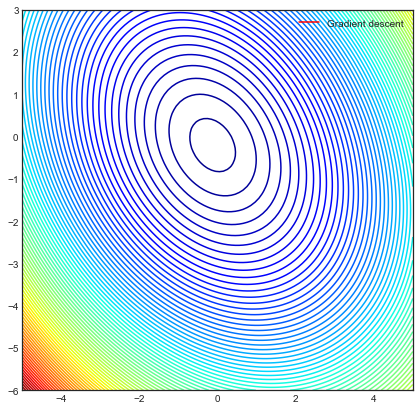

In [5]:
#Plot the contour
fig1, ax1 = plt.subplots(figsize = (7,7))
ax1.contour(T1, T2, Z, 100, cmap = 'jet')


# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], '*', color = 'red', markersize = 4)
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

def init_1():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate_1(i):
    # Animate line
    line.set_data(theta_0[:i], theta_1[:i])
    
    # Animate points
    point.set_data(theta_0[i], theta_1[i])

    # Animate value display
    value_display.set_text('Min = ' + str(J_history_reg[i]))

    return line, point, value_display

ax1.legend(loc = 1)

anim1 = animation.FuncAnimation(fig1, animate_1, init_func=init_1,
                               frames=len(theta_0), interval=100, 
                               repeat_delay=60, blit=True)
#plt.show()
HTML(anim1.to_jshtml())